In [18]:
# import libraties

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style('whitegrid')

In [3]:
# load csv file to a dataframe

df = pd.read_csv('Data/SET50_download_r2/ADVANC.BK.csv', index_col = 0)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,44.599998,46.000000,43.000000,43.400002,11.032709,1039000
2000-01-05,38.200001,41.000000,38.000000,40.599998,10.320922,2624000
2000-01-06,41.000000,41.200001,38.400002,38.599998,9.812499,1341000
2000-01-07,38.599998,39.799999,38.000000,38.599998,9.812499,1164000
2000-01-10,39.799999,40.799999,39.599998,40.000000,10.168396,761000


In [4]:
df.index

Index(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-10',
       '2000-01-11', '2000-01-12', '2000-01-13', '2000-01-14', '2000-01-17',
       ...
       '2024-02-12', '2024-02-13', '2024-02-14', '2024-02-15', '2024-02-16',
       '2024-02-19', '2024-02-20', '2024-02-21', '2024-02-22', '2024-02-23'],
      dtype='object', name='Date', length=5994)

In [5]:
# set index from object to datetime

df.set_index(pd.to_datetime(df.index), inplace = True)
df.index

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2024-02-12', '2024-02-13', '2024-02-14', '2024-02-15',
               '2024-02-16', '2024-02-19', '2024-02-20', '2024-02-21',
               '2024-02-22', '2024-02-23'],
              dtype='datetime64[ns]', name='Date', length=5994, freq=None)

In [6]:
# get data from 2020

df = df['2020':]
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,214.0,219.0,212.0,218.0,183.957199,5921300
2020-01-03,216.0,217.0,215.0,216.0,182.269547,4426800
2020-01-06,216.0,220.0,216.0,217.0,183.113388,5147100
2020-01-07,218.0,224.0,217.0,223.0,188.176453,7220900
2020-01-08,221.0,223.0,219.0,220.0,185.644913,6768300


In [7]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-19,209.0,210.0,208.0,209.0,209.0,4822100
2024-02-20,210.0,210.0,207.0,207.0,207.0,4352500
2024-02-21,208.0,209.0,203.0,205.0,205.0,12475500
2024-02-22,205.0,211.0,204.0,209.0,209.0,9222400
2024-02-23,209.0,209.0,206.0,206.0,206.0,4196600


In [8]:
df.shape

(1006, 6)

### Simple Return

$$
\frac{P_t}{P_{t-1}} - 1
$$

In [9]:
# add new calculated column for simple return

df['simple_return'] = (df['Close']/df['Close'].shift(1)) - 1
df.head()

,Open,High,Low,Close,Adj Close,Volume,simple_return
Date,,,,,,,
2020-01-02,214.0,219.0,212.0,218.0,183.957199,5921300,NaN
2020-01-03,216.0,217.0,215.0,216.0,182.269547,4426800,-0.009174
2020-01-06,216.0,220.0,216.0,217.0,183.113388,5147100,0.004630
2020-01-07,218.0,224.0,217.0,223.0,188.176453,7220900,0.027650
2020-01-08,221.0,223.0,219.0,220.0,185.644913,6768300,-0.013453


In [10]:
216.0/218.0 - 1

-0.00917431192660545

In [11]:
# apply a build-in function to get simple return

df['Close'].pct_change().head() 

Date
2020-01-02         NaN
2020-01-03   -0.009174
2020-01-06    0.004630
2020-01-07    0.027650
2020-01-08   -0.013453
Name: Close, dtype: float64

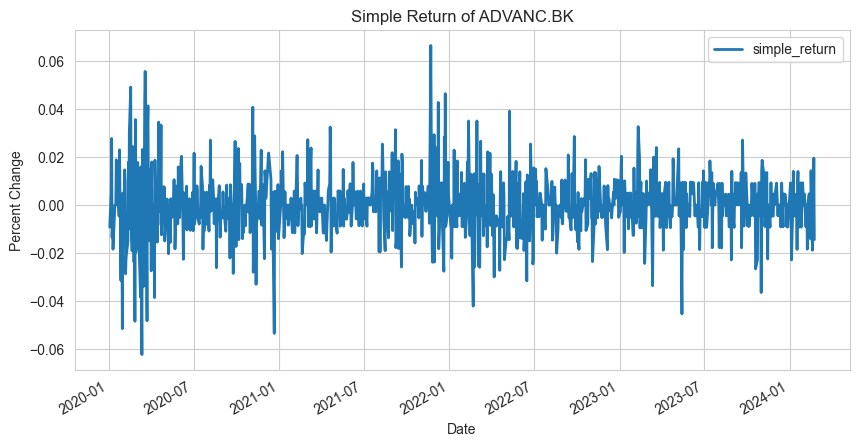

In [21]:
# plot

plt.rcParams['figure.figsize'] = (10.0, 5.0)

df[['simple_return']].plot(linewidth = 2)
plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.title('Simple Return of ADVANC.BK')
plt.show()

In [14]:
df['simple_return'].mean()

2.78089765051957e-05

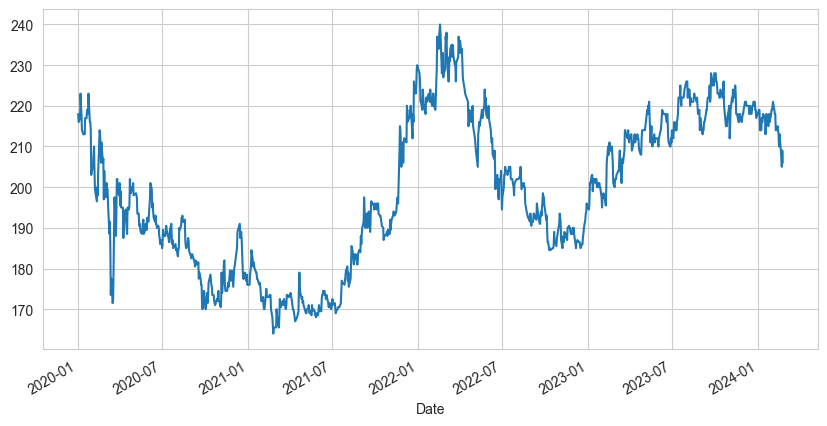

In [15]:
df['Close'].plot(); # plot

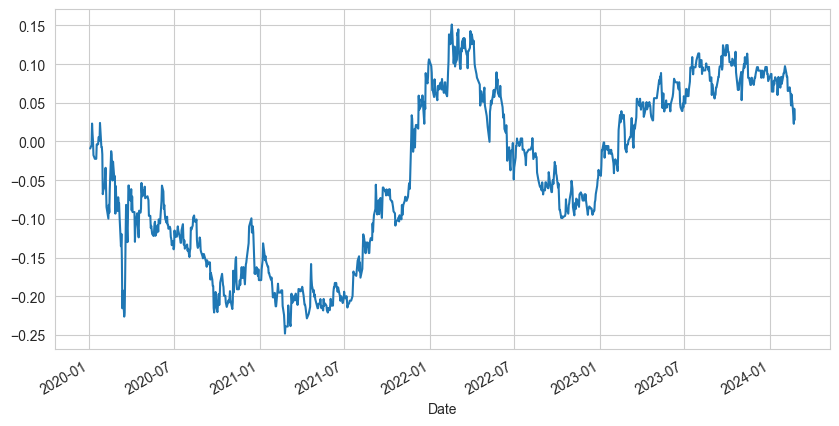

In [17]:
df['simple_return'].cumsum().plot(); # plot cumsum

### Log Return

$$
ln(\frac{P_t}{P_{t-1}})
$$

In [19]:
# add a new calculated column for log return


df['log_return'] = np.log(df['Close']/df['Close'].shift(1))
df.head()

,Open,High,Low,Close,Adj Close,Volume,simple_return,log_return
Date,,,,,,,,
2020-01-02,214.0,219.0,212.0,218.0,183.957199,5921300,NaN,NaN
2020-01-03,216.0,217.0,215.0,216.0,182.269547,4426800,-0.009174,-0.009217
2020-01-06,216.0,220.0,216.0,217.0,183.113388,5147100,0.004630,0.004619
2020-01-07,218.0,224.0,217.0,223.0,188.176453,7220900,0.027650,0.027274
2020-01-08,221.0,223.0,219.0,220.0,185.644913,6768300,-0.013453,-0.013544


In [20]:
np.log(216.0/218.0)

-0.009216655104923952

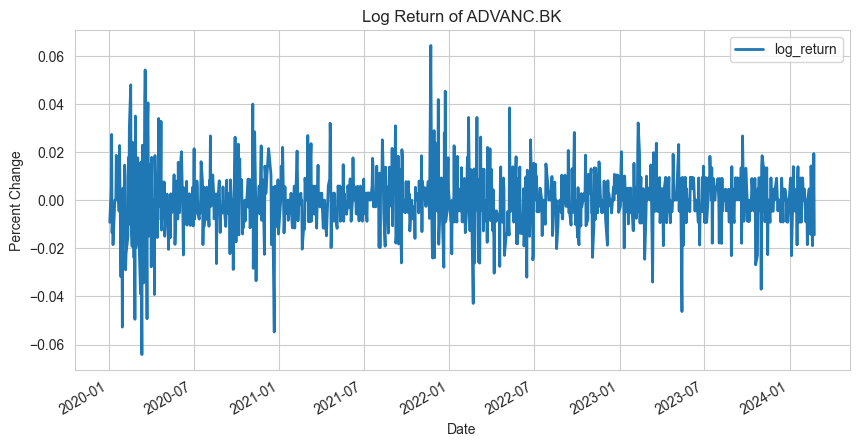

In [22]:
# plot

plt.rcParams['figure.figsize'] = (10.0, 5.0)

df[['log_return']].plot(linewidth = 2)
plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.title('Log Return of ADVANC.BK')
plt.show()

In [24]:
df['log_return'].mean()

-5.6337207959711395e-05

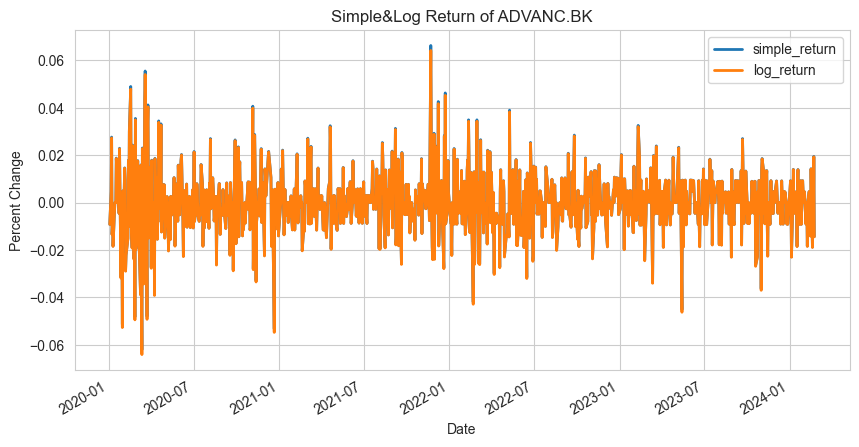

In [23]:
# plot

plt.rcParams['figure.figsize'] = (10.0, 5.0)

df[['simple_return', 'log_return']].plot(linewidth = 2)
plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.title('Simple&Log Return of ADVANC.BK')
plt.show()

In [25]:
# Annual Log Return

annual_log_return = df['log_return'].mean() * 252
annual_log_return

-0.01419697640584727

In [26]:
print(f'Annual Return: {(annual_log_return * 100):.4}%')

Annual Return: -1.42%
